Exploratory data analysis
p.s-> To predict whether the passenger is survived or not

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("titanic-training-data.csv")


In [4]:
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


sibsp= sibling or spouse having
parch= parent child
embarked= station ,port at which passenger got into the ship


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#find the missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# DATA UNDERSTANDING PART
Unvariate Analysis- one attribute

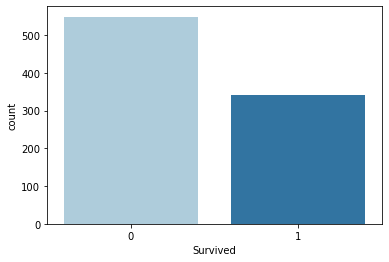

In [8]:
sns.countplot(x="Survived",data =df,palette="Paired")
plt.show()

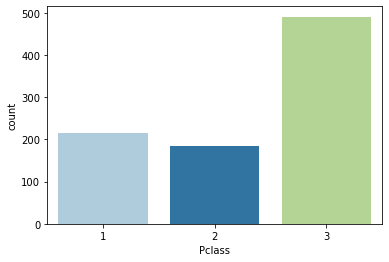

In [9]:
sns.countplot(x="Pclass",data =df,palette="Paired")
plt.show()

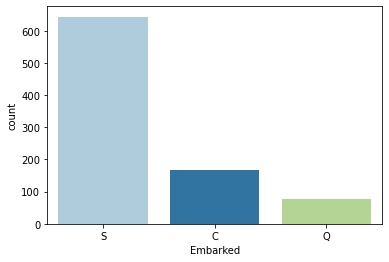

In [10]:
sns.countplot(x="Embarked",data =df,palette="Paired")
plt.show()

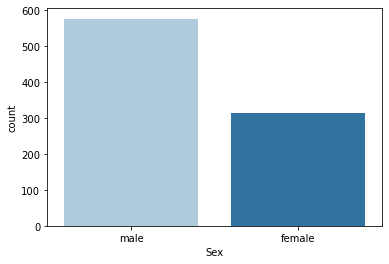

In [11]:
sns.countplot(x="Sex",data =df,palette="Paired")
plt.show()

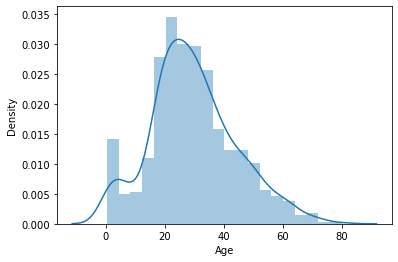

In [12]:
sns.distplot(df['Age'])
plt.show()

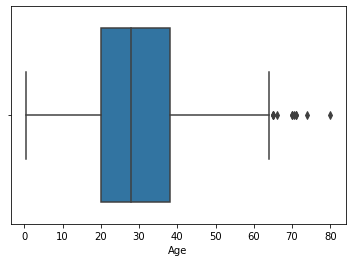

In [13]:
sns.boxplot(df['Age'])
plt.show()

In [14]:
q1=df["Age"].quantile(0.25)
q3=df["Age"].quantile(0.75)
iqr=q3-q1

In [15]:
lower_threshold=q1-1.5*iqr
upper_threshold=q3+1.5*iqr

In [16]:
lower_threshold

-6.6875

In [17]:
upper_threshold

64.8125

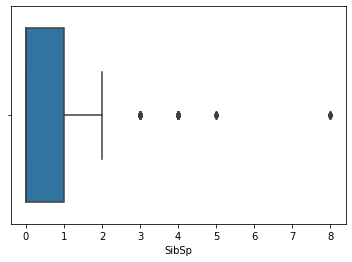

In [18]:
sns.boxplot(df['SibSp'])
plt.show()

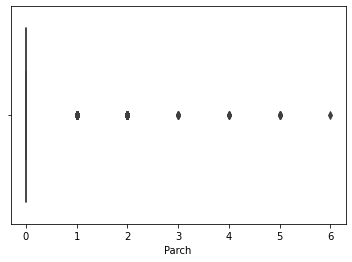

In [19]:
sns.boxplot(df['Parch'])
plt.show()

# Bivariate Analysis

<AxesSubplot:xlabel='Sex', ylabel='count'>

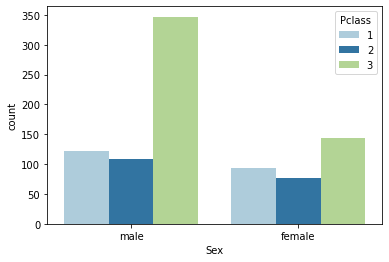

In [20]:
sns.countplot(x="Sex",hue="Pclass",data =df,palette="Paired")


<AxesSubplot:xlabel='Sex', ylabel='count'>

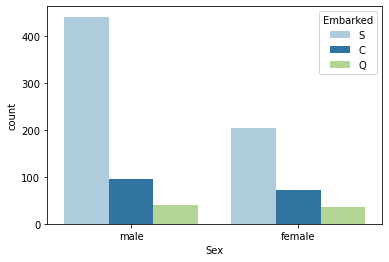

In [21]:
sns.countplot(x="Sex",hue="Embarked",data =df,palette="Paired")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

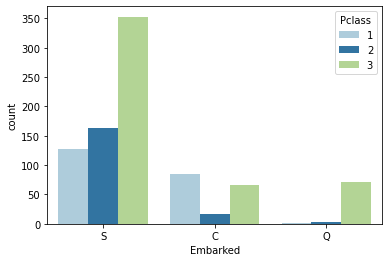

In [22]:
sns.countplot(x="Embarked",hue="Pclass",data =df,palette="Paired")

one or two categorical data do with countplot
one numerical do with histogram or distplot or boxplot
one numerical and one categorical go with boxplot or violinplot or swarmplot

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

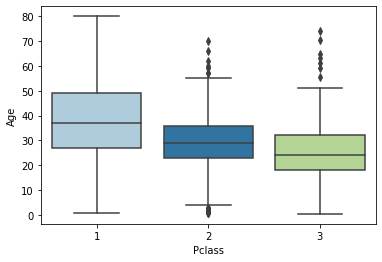

In [23]:
sns.boxplot(x="Pclass",y="Age",data =df,palette="Paired")   # this is for one numerical and one categorical 

<AxesSubplot:xlabel='Sex', ylabel='Age'>

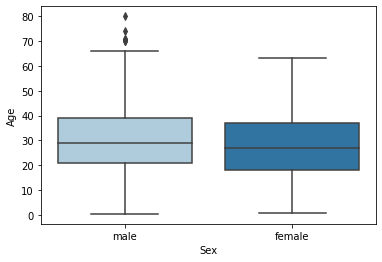

In [24]:
sns.boxplot(x="Sex",y="Age",data =df,palette="Paired")

# Multivariate Analysis

<AxesSubplot:xlabel='Sex', ylabel='Age'>

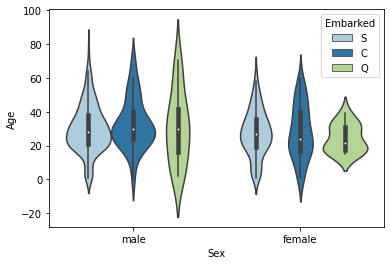

In [25]:
sns.violinplot(x="Sex",y="Age",hue="Embarked",data=df,palette="Paired")

<AxesSubplot:xlabel='Sex', ylabel='Age'>

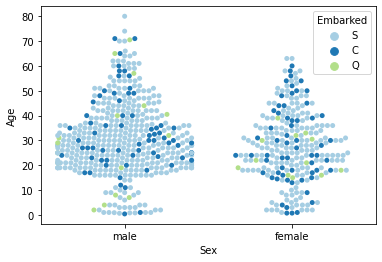

In [26]:
sns.swarmplot(x="Sex",y="Age",hue="Embarked",data=df,palette="Paired")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

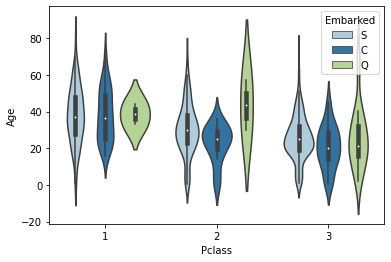

In [27]:
sns.violinplot(x="Pclass",y="Age",hue="Embarked",data=df,palette="Paired")

In [28]:
df=df.drop(columns=["PassengerId","Ticket","Fare","Name","Cabin"],axis=1)

In [29]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


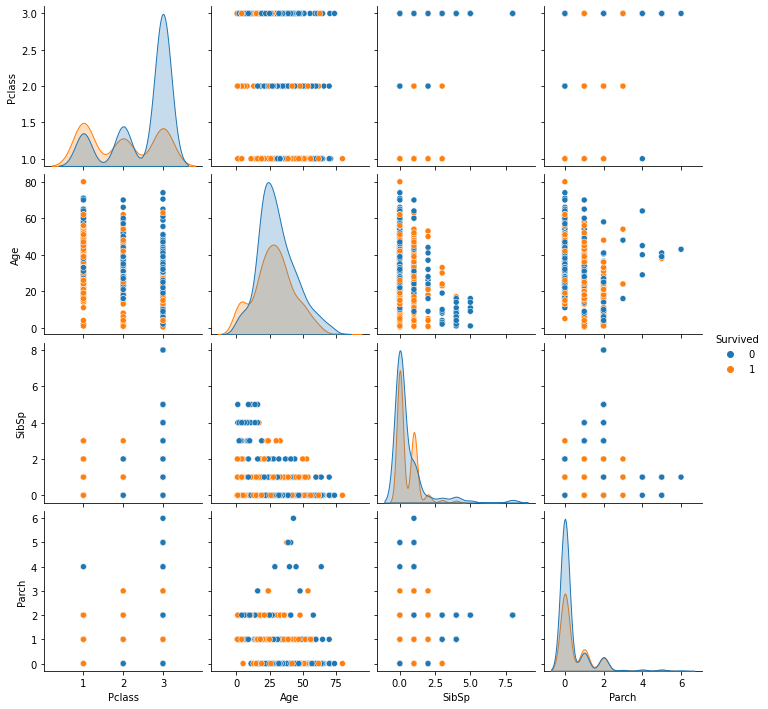

In [30]:
sns.pairplot(df,hue="Survived")

# outlier Treatment

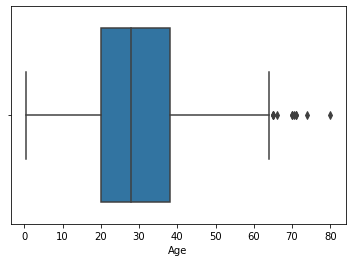

In [31]:
sns.boxplot(df['Age'])
plt.show()

In [32]:
df=df[(df["Age"]>=lower_threshold)&(df["Age"]<=upper_threshold)]   #solved above

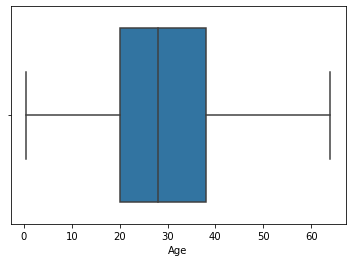

In [33]:
sns.boxplot(df['Age'])
plt.show()                 # outliers are removed now

do the same with sibsp

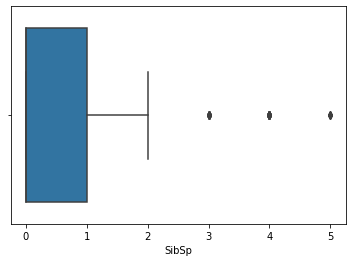

In [34]:
sns.boxplot(df['SibSp'])
plt.show() 

In [35]:
q1=df["SibSp"].quantile(0.25)
q3=df["SibSp"].quantile(0.75)
iqr=q3-q1

In [36]:
lower_threshold=q1-1.5*iqr
upper_threshold=q3+1.5*iqr

In [37]:
df=df[(df["SibSp"]>=lower_threshold)&(df["SibSp"]<=upper_threshold)]   

In [38]:
lower_threshold

-1.5

In [39]:
upper_threshold

2.5

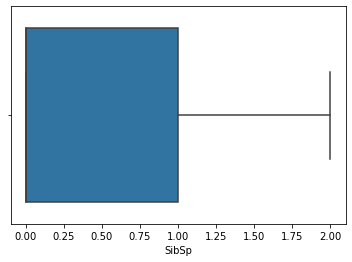

In [40]:
sns.boxplot(df['SibSp'])
plt.show() 

# Missing values in the dataset

In [41]:
median1=df["Age"].median()              #for numerical dataset
df["Age"]=df["Age"].fillna(median1)    #fill missing values with median one

In [42]:
mode1=df["Embarked"].mode()[0]       #for categorical data use mode ---[0]consider value with zero index
df["Embarked"]=df["Embarked"].fillna(mode1)

In [43]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

Encoding

In [44]:
#changing all datatypes to integer
df=pd.get_dummies(df,columns=["Sex","Embarked"])  #one hot encoding

In [45]:
df.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [46]:
df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [147]:
X=df.drop(["Survived"],axis=1)
y=df[["Survived"]]

In [154]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [155]:
model_lrc=LogisticRegression()

In [156]:
model_lrc.fit(X_train,y_train)

LogisticRegression()

In [157]:
model_lrc.score(X_train,y_train)

0.8137044967880086

In [158]:
model_lrc.score(X_test,y_test)

0.8009950248756219